# Analyze the Document Term Matrix

This notebook continues our analysis of document similarity based on shared entries.

Note: This notebook uses the R Kernel. See `03_analyze_sections.ipynb` for further instructions concerning installing the R kernel and loading libraries.

In [1]:
# To load libraries in the R kernel in Jupyter Notebooks, you need to know
# where your Jupyter Notebook is looking for libraries (the library path).
# Often, there will be two locations where R libraries are installedf. 
# You can find all of these locations by running the following command.
.libPaths()

[1] "/anaconda/lib/R/library"

In [2]:
# set the variable `lib.dir` to one of your library paths
lib.dir = '/anaconda/lib/R/library'

In [3]:
# load libraries for packages used in this notebook
library(ggplot2, lib.loc = lib.dir)
library(ggdendro, lib.loc = lib.dir)
library(reshape, lib.loc = lib.dir)
library(scales, lib.loc = lib.dir)

#install.packages("RColorBrewer")
library(RColorBrewer, lib.loc = lib.dir)

# Note, you need to install these packages first. If you haven't already
# done that, see `03_analyze_sections.ipynb`. 

In [4]:
# Read in dtm from file output by previous notebook.
dtm_df = read.csv('../data/pass/Q39_par_dtm.csv', 
                  stringsAsFactors = F, row.names = 1) 

## Check how R parsed the DTM 
- R doesn't allow variable names to start with a number. Entries starting with a number had "X" added to the beggining of the entry name.  
- R doesn't allow parentheses or brackets in variable names, so entries like "1(ban₂)[na]na" parsed as "X1.ban...na.na".   

In a later cell, we will sum the columns and rows to get an idea of the
density of the matrix. In order to avoid iteratively summing the summary 
column and summary row, we need to set variables specifying the 
columns and rows we want to sum. This needs to be a separate cell from
the cell in which we actually do the summing.

In [5]:
cols_to_sum = ncol(dtm_df)
rows_to_sum = nrow(dtm_df)

head(dtm_df)
dim(dtm_df) 
# The call to dim should not change if you run this cell multiple times. 
# If it does, there is a problem.

,X1.2.na.na_giŋ.unit.n,X5.6.na.na_sila.unit.n,a.arm.n_apin.plow.n,a.arm.n_diš.na.na,a.arm.n_gud.ox.n_apin.plow.n,a.arm.n_umbin.wheel.n_margida.cart.n,a.arm.n_ŋešrin.scales.n,ab.cow.n,ab.cow.n_ib.hips.n_gig.sick.v.i,ab.cow.n_mah.mature.v.i,⋯,šuʾa.stool.n_burgul.stone.cutter.n,šuʾa.stool.n_dus.bathroom.n,šuʾa.stool.n_kaskal.way.n,šuʾa.stool.n_nagar.carpenter.n,šuʾa.stool.n_niŋgula.greatness.n,šuʾa.stool.n_suhsah.sound.n,šuʾa.stool.n_tibira.sculptor.n,šuʾa.stool.n_x.na.na,šuʾa.stool.n_šu.hand.n,šuʾa.stool.n_šuʾi.barber.n
P117395,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
P117404,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
P128345,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
P224980,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
P224986,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
P224994,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


[1]  138 3375

## Check density of DTM

Two attributes of the DTM which are of interest to us are:

1) Distribution of document lengths (number of entries per document).  
2) Distribution of entry frequency (number of times each entry appears across the corpus). Note that an entry may appear multiple times in a single document.

We will look at these two distributions below.

In [6]:
# Illustration that entries may appear multiple times in a single document.
# Output shows each entry that appears more than once within a document, along with the 
# maximum number of times that it appears within a document.

for(x in colnames(dtm_df)) {

    num_appearances = unname(unlist(unique(dtm_df[x])))
    if(any(num_appearances > 1)) print(paste(x, max(num_appearances)))
    
    }

[1] "ab.cow.n_si.horn.n_ŋal.be.v.i 2"
[1] "ab.cow.n_utud.bear.v.t 2"
[1] "ab.cow.n_ŋeš.penis.n_zu.know.v.t 2"
[1] "al.hoe.n 4"
[1] "al.hoe.n_saŋ.head.n_ŋal.be.v.i 2"
[1] "al.hoe.n_zu.tooth.n_diš.one.nu 4"
[1] "al.hoe.n_zu.tooth.n_eš.three.nu 4"
[1] "al.hoe.n_zu.tooth.n_limmu.four.nu 2"
[1] "al.hoe.n_zu.tooth.n_min.two.nu 4"
[1] "ala.drum.n 2"
[1] "amam.jar.n 2"
[1] "amamsab.jar.n 2"
[1] "apin.plow.n_kešed.bind.v.t 2"
[1] "apin.plow.n_tugsaga.plow.n 6"
[1] "apin.plow.n_zir.break.v.t 6"
[1] "apin.plow.n_šu.hand.n 8"
[1] "apin.plow.n_šudu.equipped.aj 12"
[1] "arina.madder.n 2"
[1] "arina.root.n 2"
[1] "asal.poplar.n 2"
[1] "azalulu.multitude.n 2"
[1] "ašgar.kid.n_ŋeš.penis.n_zu.know.v.t 2"
[1] "ašita.equipment.n 2"
[1] "ba.tool.n_pa.x.na.na 2"
[1] "bandudu.basket.n 2"
[1] "baneš.container.n 2"
[1] "banmin.vessel.n 2"
[1] "banšur.table.n 2"
[1] "bariga.unit.n 2"
[1] "bisaŋ.basket.n_x.na.na 4"
[1] "bulug.needle.n 3"
[1] "buniŋ.trough.n 2"
[1] "buniŋ.trough.n_x.na.na 7"
[1] "da.line.n_apin.p

In [7]:
# Add a column showing the number of entries in each document.
dtm_df$num_entries = rowSums(dtm_df[1:cols_to_sum])

# Add a row showing the number of occurrences of each entry.
dtm_df["num_occurrences",] = colSums(dtm_df[1:rows_to_sum,])

# The intersection of these two summaries is meaningless, set to NA.
dtm_df["num_occurrences","num_entries"] = NA 

[1] "There are 56 documents with 10 or more entries."
[1] "There are 22 documents with 100 or more entries."


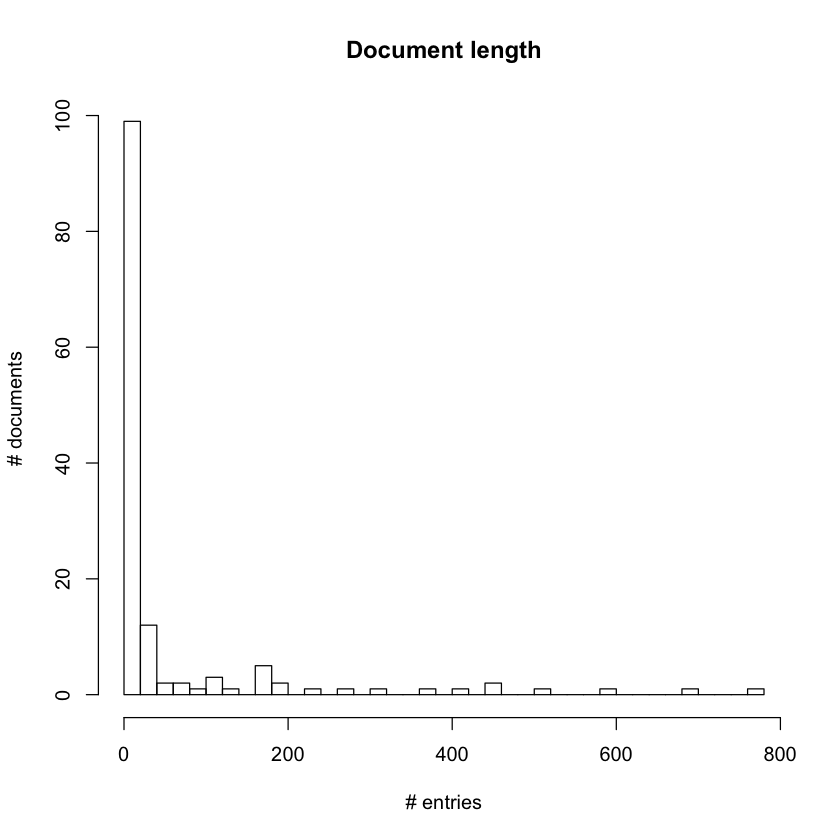

In [8]:
hist(dtm_df$num_entries, breaks = 30, main = "Document length", 
    ylab = "# documents", xlab = "# entries")

# Print out some summary statements.
print(paste("There are", length(which(dtm_df$num_entries >= 10)), "documents with 10 or more entries."))
print(paste("There are", length(which(dtm_df$num_entries >= 100)), "documents with 100 or more entries."))

We see that the majority of documents are very short. However, there are a decent number of documents with a substantial number of entries (summarized above). 

# Look at document length
Which documents are the longest? (This will be important when looking for issues like long-branch attraction in our dendrograms.)

In [9]:
dtm_df = dtm_df[order(dtm_df$num_entries, decreasing = TRUE),]

head(dtm_df["num_entries"])

,num_entries
Q000039,778
P273880,698
P271911,592
Q000001,511
P271301,452
P247864,445


We then look at the distribution of entries across the corpus.

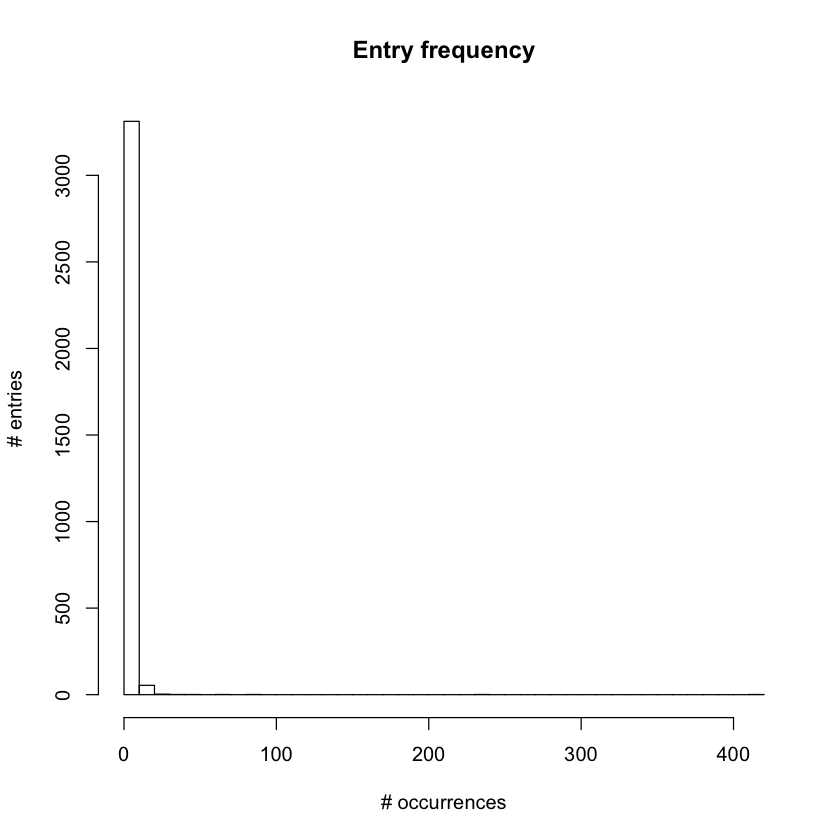

[1] "78.4% of entries appear only once or twice across the corpus"
[1] "83 entries occur 10 or more times within the corpus"
[1] "Including one that occurs 416 times within the 138 documents"
[1] "The most common entry is ' unknown '"


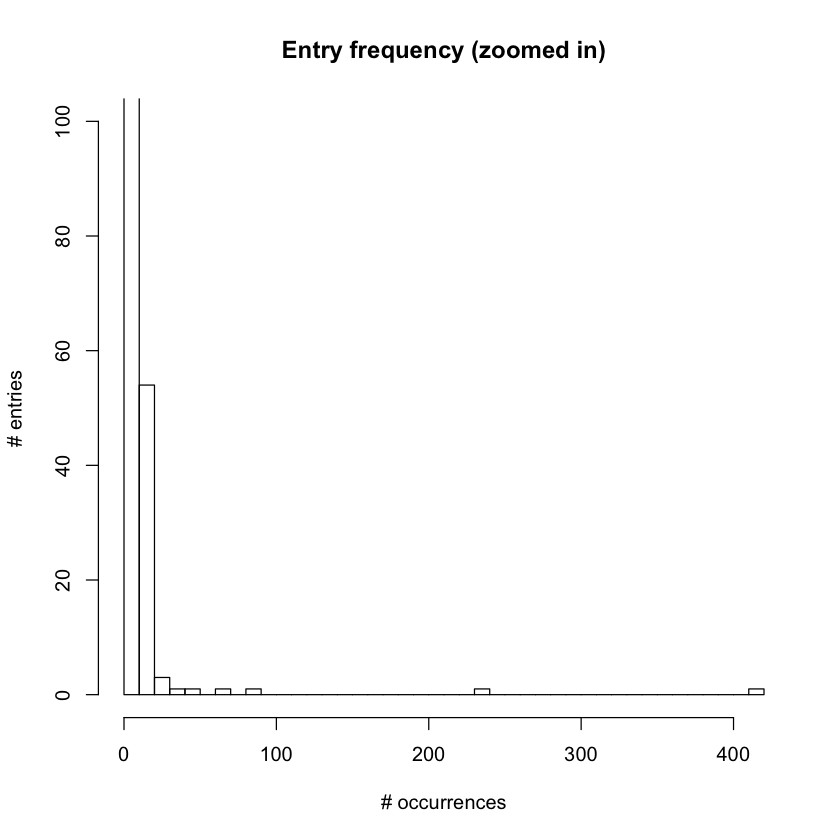

In [10]:
num_occurrences = unlist(dtm_df["num_occurrences",])
hist(num_occurrences, breaks = 30, main = "Entry frequency", 
    ylab = "# entries", xlab = "# occurrences")
hist(num_occurrences, breaks = 30, ylim = c(0, 100), 
     main = "Entry frequency (zoomed in)", 
    ylab = "# entries", xlab = "# occurrences")

rare = round(length(which(dtm_df["num_occurrences",] <=2))/cols_to_sum*100,2)
common_entries = colnames(dtm_df[which(dtm_df["num_occurrences",] >=10)])
most_common = max(dtm_df["num_occurrences",], na.rm = TRUE)
most_common_entry = colnames(dtm_df[which(dtm_df["num_occurrences",] == most_common)])

print(paste0(rare, "% of entries appear only once or twice across the corpus"))
print(paste(length(common_entries), "entries occur 10 or more times within the corpus"))
print(paste("Including one that occurs", most_common, "times within the", rows_to_sum, "documents"))
print(paste("The most common entry is '", most_common_entry, "'"))

Below we inspect the most common entries (those that appear at least ten times across the corpus) to see if they make sense.

In [11]:
# Look at some of the most common entries
common_entries

[1] "al.hoe.n"                           "al.hoe.n_zu.tooth.n_eš.three.nu"   
 [3] "al.hoe.n_zu.tooth.n_limmu.four.nu"  "al.hoe.n_zu.tooth.n_min.two.nu"    
 [5] "allanum.oak.n"                      "apin.plow.n_tugsaga.plow.n"        
 [7] "apin.plow.n_šu.hand.n"              "apin.plow.n_šudu.equipped.aj"      
 [9] "buniŋ.trough.n_x.na.na"             "dih.weed.n"                        
[11] "dilim.spoon.n"                      "e.house.n_gigir.chariot.n"         
[13] "ellag.ball.n"                       "esi.tree.n"                        
[15] "gigir.chariot.n"                    "girim.flower.n"                    
[17] "guza.chair.n"                       "guza.chair.n_gid.long.v.i"         
[19] "guza.chair.n_x.na.na"               "halub.tree.n"                      
[21] "hašhur.apple.n"                     "hašhur.apple.n_armanu.tree.n"      
[23] "hašhur.apple.n_kur.mountain.n"      "ildag.poplar.n"                    
[25] "ildag.poplar.n_kur.mountain.n"      "ilianum.tree.n"                    
[27] "kid.da.twig.n"                      "kur.wood.n"                        
[29] "lamgal.nut.n"                       "lamtur.nut.n"                      
[31] "ligima.shoot.n"                     "ma.ship.n_niš.twenty.nu_gur.unit.n"
[33] "ma.ship.n_u.ten.nu_gur.unit.n"      "ma.ship.n_x.na.na"                 
[35] "madal.pole.n"                       "manu.wood.n"                       
[37] "margida.cart.n"                     "maš.plant.n"                       
[39] "mes.tree.n"                         "mud.stump.n_ŋešnimbar.palm.n"      
[41] "naŋa.mortar.n"                      "pa.branch.n_ŋešnimbar.palm.n"      
[43] "peš.fig.n"                          "su.fibers.n_ŋešnimbar.palm.n"      
[45] "sugin.rot.n"                        "sumungi.tool.n"                    
[47] "taškarin.boxwood.n"                 "tiʾarum.tree.n"                    
[49] "tubala.harness.n_ŋešnimbar.palm.n"  "unknown"                           
[51] "urnum.cedar.n"                      "x.x.na.na"                         
[53] "x.na.na"                            "x.na.na_margida.cart.n"            
[55] "x.na.na_ŋešnimbar.palm.n"           "zena.midrib.n_ŋešnimbar.palm.n"    
[57] "zirdum.olive.n"                     "X.ŋeš.kal.na.na"                   
[59] "X.ŋeš.x.x.x.na.na"                  "X.ŋeš.x.x.na.na"                   
[61] "X.ŋeš.x.na.na"                      "X.ŋeš.x.na.na_apin.plow.n"         
[63] "X.ŋeš.x.na.na_x.na.na"              "ŋešaʾabak.tree.n"                  
[65] "ŋešgana.tree.n"                     "ŋešgana.tree.n_babbar.white.v.i"   
[67] "ŋešgana.tree.n_giggi.black.v.i"     "ŋešnimbar.palm.n"                  
[69] "ŋešnimbar.palm.n_al.x.na.na"        "ŋešnimbar.palm.n_x.x.na.na"        
[71] "ŋešnimbar.palm.n_x.na.na"           "ŋešnimbar.palm.n_šeŋ.cook.v.t"     
[73] "ŋeštin.vine.n"                      "ŋeštinguruma..vine.n"              
[75] "ŋeštinkaʾa.grape.n"                 "ŋeštinkira.berry.n"                
[77] "ŋipar.tree.n"                       "ŋirigub.footstool.n"               
[79] "šag.heart.n_ŋešnimbar.palm.n"       "šagkal.tree.n"                     
[81] "šedug.tree.n"                       "šennur.plum.n"                     
[83] "šenu.tree.n"

As seen from the output above, many of the most common entries include
either unlematizable or illegible words (represented as x.na.na or x.x.na.na). 
These are not particularly informative. We want to remove these entries from the analysis. Also remove the entry "unknown".

In [12]:
# remove na.na entries
entries_with_na = grep("na.na", colnames(dtm_df))

if(length(entries_with_na) > 0) {
dtm_df = dtm_df[,-entries_with_na]
dtm_df$unknown = NULL
    }

head(dtm_df)

,a.arm.n_apin.plow.n,a.arm.n_gud.ox.n_apin.plow.n,a.arm.n_umbin.wheel.n_margida.cart.n,a.arm.n_ŋešrin.scales.n,ab.cow.n,ab.cow.n_ib.hips.n_gig.sick.v.i,ab.cow.n_mah.mature.v.i,ab.cow.n_peš.thick.v.i,ab.cow.n_si.horn.n_ŋal.be.v.i,ab.cow.n_suhub..oxen.n,⋯,šuʾa.stool.n_burgul.stone.cutter.n,šuʾa.stool.n_dus.bathroom.n,šuʾa.stool.n_kaskal.way.n,šuʾa.stool.n_nagar.carpenter.n,šuʾa.stool.n_niŋgula.greatness.n,šuʾa.stool.n_suhsah.sound.n,šuʾa.stool.n_tibira.sculptor.n,šuʾa.stool.n_šu.hand.n,šuʾa.stool.n_šuʾi.barber.n,num_entries
Q000039,1,1,0,0,0,0,0,0,0,0,⋯,1,1,1,1,1,0,1,0,0,778
P273880,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,698
P271911,1,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,592
Q000001,0,0,0,0,1,1,1,1,2,1,⋯,0,0,0,0,0,0,0,0,0,511
P271301,0,0,0,0,0,0,0,0,0,0,⋯,1,1,0,0,1,1,1,0,1,452
P247864,0,0,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,1,1,0,0,445


Look again at entry frequency after removing these entries.

Note that we must re-create the summary column and row after excluding these entries.

In [13]:
# Remove summary column and row
dtm_df$num_entries = NULL
dtm_df = dtm_df[-which(rownames(dtm_df) == "num_occurrences"),]

cols_to_sum = ncol(dtm_df)
rows_to_sum = nrow(dtm_df)

In [14]:
# Add a column showing the number of entries in each document.
dtm_df$num_entries = rowSums(dtm_df[1:cols_to_sum])

# Add a row showing the number of occurances of each entry.
dtm_df["num_occurrences",] = colSums(dtm_df[1:rows_to_sum,])

# The intersection of these two summaries is meaningless, set to NA.
dtm_df["num_occurrences","num_entries"] = NA 

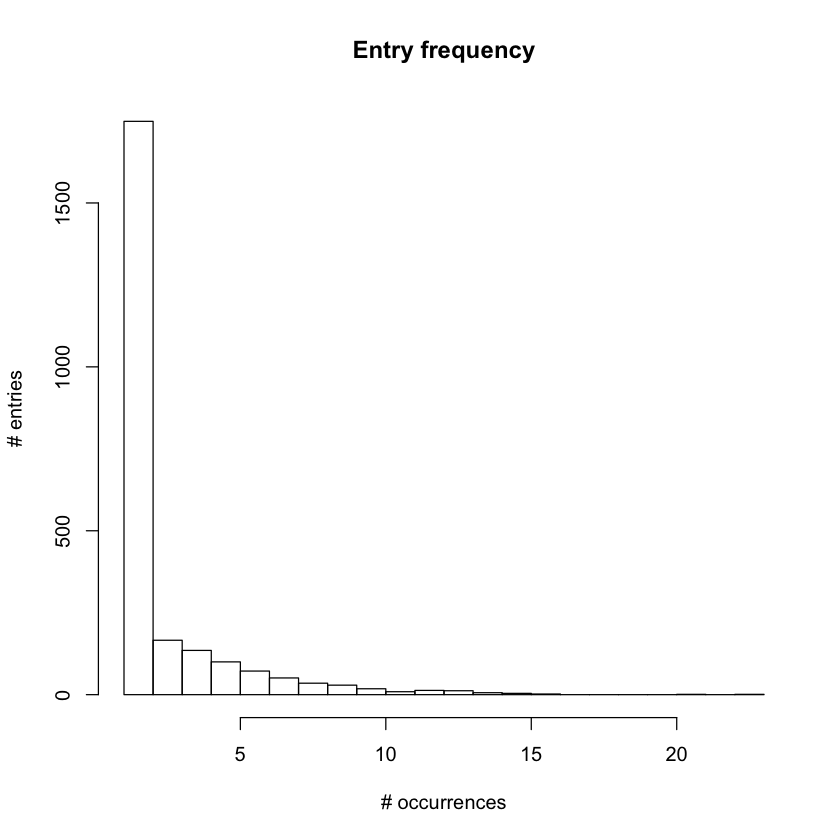

[1] "72.78% of entries appear only once or twice across the corpus"
[1] "66 entries occur 10 or more times within the corpus"
[1] "Including one that occurs 23 times within the 138 documents"
[1] "The most common entry is kid.da.twig.n"


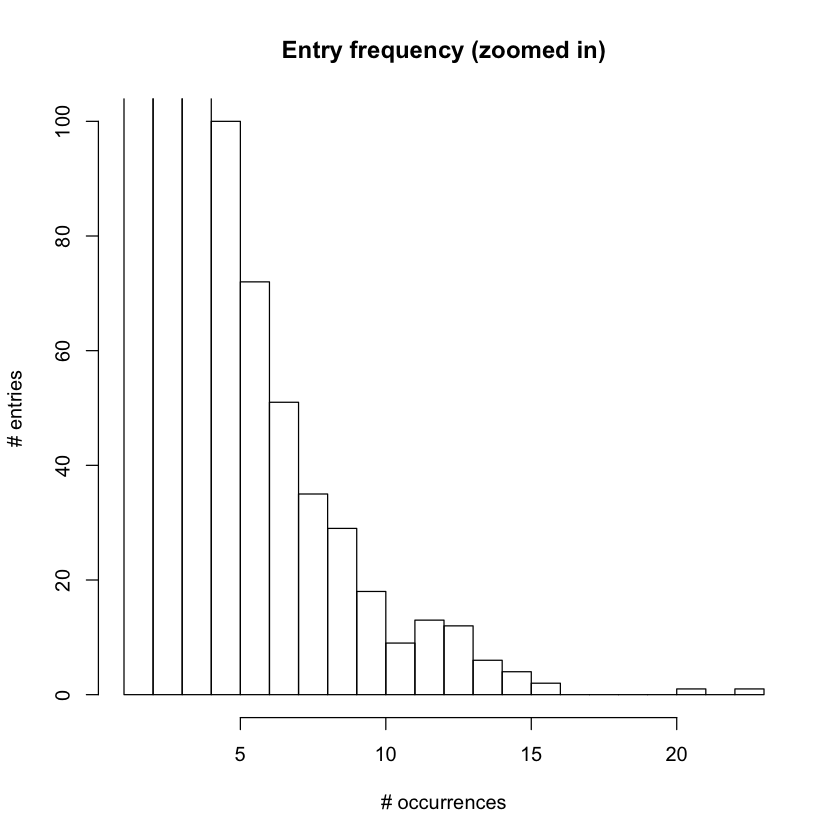

In [15]:
num_occurrences = unlist(dtm_df["num_occurrences",])
hist(num_occurrences, breaks = 30, main = "Entry frequency", 
    ylab = "# entries", xlab = "# occurrences")
hist(num_occurrences, breaks = 30, ylim = c(0, 100), 
     main = "Entry frequency (zoomed in)", 
    ylab = "# entries", xlab = "# occurrences")

rare = round(length(which(dtm_df["num_occurrences",] <=2))/cols_to_sum*100,2)
common_entries = colnames(dtm_df[which(dtm_df["num_occurrences",] >=10)])
most_common = max(dtm_df["num_occurrences",], na.rm = TRUE)
most_common_entry = colnames(dtm_df[which(dtm_df["num_occurrences",] == most_common)])

print(paste0(rare, "% of entries appear only once or twice across the corpus"))
print(paste(length(common_entries), "entries occur 10 or more times within the corpus"))
print(paste("Including one that occurs", most_common, "times within the", rows_to_sum, "documents"))
print(paste("The most common entry is", most_common_entry))

In [16]:
common_entries

[1] "al.hoe.n"                           "al.hoe.n_zu.tooth.n_eš.three.nu"   
 [3] "al.hoe.n_zu.tooth.n_limmu.four.nu"  "al.hoe.n_zu.tooth.n_min.two.nu"    
 [5] "allanum.oak.n"                      "apin.plow.n_tugsaga.plow.n"        
 [7] "apin.plow.n_šu.hand.n"              "apin.plow.n_šudu.equipped.aj"      
 [9] "dih.weed.n"                         "dilim.spoon.n"                     
[11] "e.house.n_gigir.chariot.n"          "ellag.ball.n"                      
[13] "esi.tree.n"                         "gigir.chariot.n"                   
[15] "girim.flower.n"                     "guza.chair.n"                      
[17] "guza.chair.n_gid.long.v.i"          "halub.tree.n"                      
[19] "hašhur.apple.n"                     "hašhur.apple.n_armanu.tree.n"      
[21] "hašhur.apple.n_kur.mountain.n"      "ildag.poplar.n"                    
[23] "ildag.poplar.n_kur.mountain.n"      "ilianum.tree.n"                    
[25] "kid.da.twig.n"                      "kur.wood.n"                        
[27] "lamgal.nut.n"                       "lamtur.nut.n"                      
[29] "ligima.shoot.n"                     "ma.ship.n_niš.twenty.nu_gur.unit.n"
[31] "ma.ship.n_u.ten.nu_gur.unit.n"      "madal.pole.n"                      
[33] "manu.wood.n"                        "margida.cart.n"                    
[35] "maš.plant.n"                        "mes.tree.n"                        
[37] "mud.stump.n_ŋešnimbar.palm.n"       "naŋa.mortar.n"                     
[39] "pa.branch.n_ŋešnimbar.palm.n"       "peš.fig.n"                         
[41] "su.fibers.n_ŋešnimbar.palm.n"       "sugin.rot.n"                       
[43] "sumungi.tool.n"                     "taškarin.boxwood.n"                
[45] "tiʾarum.tree.n"                     "tubala.harness.n_ŋešnimbar.palm.n" 
[47] "urnum.cedar.n"                      "zena.midrib.n_ŋešnimbar.palm.n"    
[49] "zirdum.olive.n"                     "ŋešaʾabak.tree.n"                  
[51] "ŋešgana.tree.n"                     "ŋešgana.tree.n_babbar.white.v.i"   
[53] "ŋešgana.tree.n_giggi.black.v.i"     "ŋešnimbar.palm.n"                  
[55] "ŋešnimbar.palm.n_šeŋ.cook.v.t"      "ŋeštin.vine.n"                     
[57] "ŋeštinguruma..vine.n"               "ŋeštinkaʾa.grape.n"                
[59] "ŋeštinkira.berry.n"                 "ŋipar.tree.n"                      
[61] "ŋirigub.footstool.n"                "šag.heart.n_ŋešnimbar.palm.n"      
[63] "šagkal.tree.n"                      "šedug.tree.n"                      
[65] "šennur.plum.n"                      "šenu.tree.n"

Next we will reorganize our data to enable pretty and informative plotting of entry distribution across documents and overall frequency.

First, we reorder the columns in our dataframe from alphabetical to
sorting by frequency so that the most common entries are clustered together for ease of visualization.

To do this, we first convert the frequency counts to presence/absence (binary), then reorder the columns by column sums.

In [17]:
# Convert to binary presence/absence information
dtm_df = as.matrix((dtm_df > 0) + 0)

dtm_df = dtm_df[,order(colSums(dtm_df), decreasing = TRUE)]
dtm_df = as.data.frame(dtm_df)

We then recalculate number of occurrences
and number of entries. These are now binary, so they
represent:

num_occurrences = number of documents in which an entry appears  
num_entries = number of unique entries in a document (excluding "na.na" and "unknown" entries)

In [18]:
dtm_df$num_entries = rowSums(dtm_df[1:cols_to_sum])
dtm_df["num_occurrences",] = colSums(dtm_df[1:rows_to_sum,])
dtm_df["num_occurrences","num_entries"] = NA 

num_occurrences = unlist(dtm_df["num_occurrences",])
most_frequent = max(num_occurrences, na.rm = TRUE)
most_frequent_entry = colnames(dtm_df[which(dtm_df["num_occurrences",] == most_frequent)])

print(paste(table(num_occurrences)[1], "entries appear in only one document"))
print(paste("The entry that appears in the most documents is", most_frequent_entry))

table(num_occurrences, useNA = "ifany")


[1] "1506 entries appear in only one document"
[1] "The entry that appears in the most documents is peš.fig.n"    
[2] "The entry that appears in the most documents is šagkal.tree.n"


num_occurrences
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 <NA> 
1506  278  154  132  100   76   50   38   26   12    8    9    9    3    2    1 

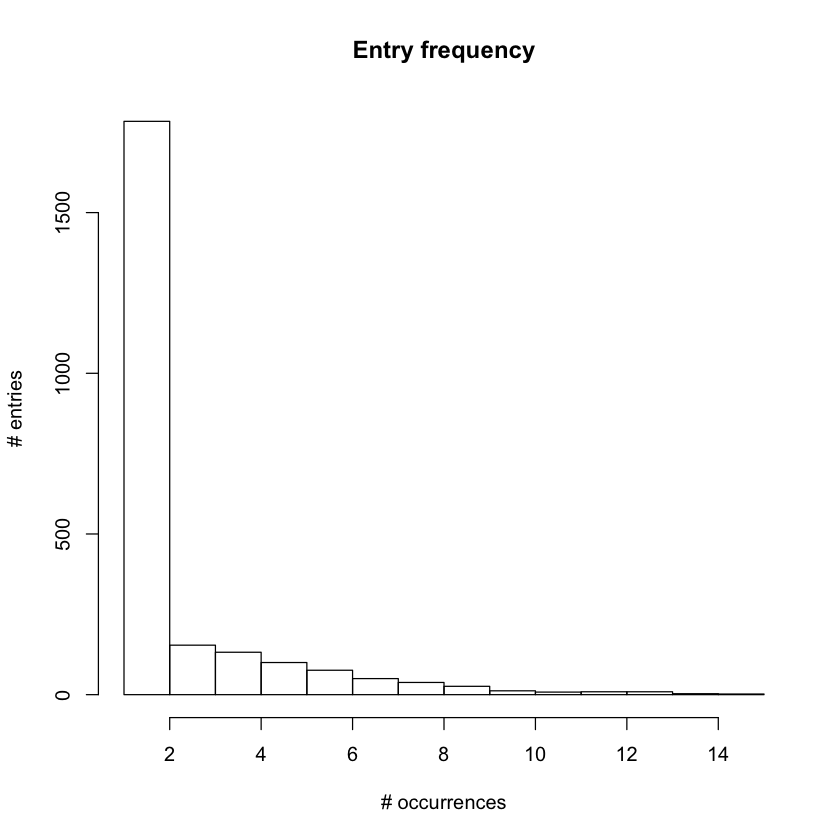

In [19]:
num_occurrences = unlist(dtm_df["num_occurrences",])
hist(num_occurrences, breaks = max(num_occurrences, na.rm = TRUE), main = "Entry frequency", 
    ylab = "# entries", xlab = "# occurrences")

In [20]:
# These entries appear in at least 10 different documents.
colnames(dtm_df)[which(dtm_df["num_occurrences",] >=10)]

[1] "peš.fig.n"                         "šagkal.tree.n"                    
 [3] "allanum.oak.n"                     "ŋeštin.vine.n"                    
 [5] "ŋeštinkira.berry.n"                "al.hoe.n"                         
 [7] "esi.tree.n"                        "gigir.chariot.n"                  
 [9] "hašhur.apple.n"                    "hašhur.apple.n_kur.mountain.n"    
[11] "ildag.poplar.n"                    "lamgal.nut.n"                     
[13] "ŋeštinguruma..vine.n"              "šennur.plum.n"                    
[15] "e.house.n_gigir.chariot.n"         "ildag.poplar.n_kur.mountain.n"    
[17] "ilianum.tree.n"                    "lamtur.nut.n"                     
[19] "tiʾarum.tree.n"                    "urnum.cedar.n"                    
[21] "ŋeštinkaʾa.grape.n"                "ŋipar.tree.n"                     
[23] "šedug.tree.n"                      "dilim.spoon.n"                    
[25] "halub.tree.n"                      "manu.wood.n"                      
[27] "margida.cart.n"                    "tubala.harness.n_ŋešnimbar.palm.n"
[29] "ŋešgana.tree.n"                    "ŋešnimbar.palm.n"                 
[31] "šenu.tree.n"                       "al.hoe.n_zu.tooth.n_min.two.nu"   
[33] "guza.chair.n"                      "guza.chair.n_gid.long.v.i"        
[35] "hašhur.apple.n_armanu.tree.n"      "kid.da.twig.n"                    
[37] "ma.ship.n_u.ten.nu_gur.unit.n"     "mud.stump.n_ŋešnimbar.palm.n"     
[39] "naŋa.mortar.n"                     "taškarin.boxwood.n"               
[41] "ŋešaʾabak.tree.n"                  "ŋešgana.tree.n_babbar.white.v.i"  
[43] "ŋešgana.tree.n_giggi.black.v.i"

Which entries appear in both Q000001 and Q000039?

In [21]:
shared_entries = which(dtm_df["Q000001",] == 1 & dtm_df["Q000039",] == 1)
dtm_df[c("Q000001", "Q000039"),shared_entries]

,az.bear.n,nemur.leopard.n,piriŋ.lion.n
Q000001,1,1,1
Q000039,1,1,1


Do these entries also appear in other documents?

In [22]:
docs_w_shared_entries = c()

for(x in rownames(dtm_df)) {
  if(any(dtm_df[x,shared_entries] > 0)) {
      docs_w_shared_entries = c(docs_w_shared_entries,x)
  }}

dtm_df[docs_w_shared_entries,shared_entries]

,az.bear.n,nemur.leopard.n,piriŋ.lion.n
Q000039,1,1,1
P271911,1,0,0
Q000001,1,1,1
num_occurrences,3,2,2


# Remove rare entries

A large number of entries appear only in one document in the corpus. We remove these from the remainder of the analysis. However, we want to keep all entries for our outlier texts.

In [23]:
# Keep all entries which appear in one of the outlier docs.
outlier_docs = c("Q000001", "P250736", "num_occurrences")
outlier_doc_data = dtm_df[outlier_docs,]
keep1 = which(outlier_doc_data["num_occurrences",] == 1)

# Also keep entries which appear in more than one document in the corpus.
keep2 = which(dtm_df["num_occurrences",] > 1)

all_keep = unique(c(keep1, keep2))

dtm_df = dtm_df[,all_keep]

dim(dtm_df)

[1]  139 2403

Our next step is to compare this presence/absence distribution of entries across documents to understand which documents are most similar to one another at the entry level. First we will perform a few clean-up steps to get the data into the correct format to build a distance matrix.

In [24]:
# add back in num_entries column
dtm_df$num_entries = rowSums(dtm_df[1:cols_to_sum])
head(dtm_df["num_entries"])

,num_entries
Q000039,680
P273880,462
P271911,356
Q000001,453
P271301,357
P247864,250


In [25]:
# include only texts with at least 10 entries
# to see if the patterns make sense before adding shorter texts

dtm_df = dtm_df[which(dtm_df$num_entries >= 10),]
dim(dtm_df)

[1]   44 2404

In [26]:
#add document names as row names
dtm_df$document = rownames(dtm_df)

# remove num_occurances row
dtm_df = dtm_df[-which(rownames(dtm_df) == "num_occurrences"),]

# remove num_entries column
dtm_df$num_entries = NULL

We next convert the dataframe from wide format to long format. In wide format, each document is a row and each entry is a column. There are as many observed values per row as their are entries. In long format, each document/entry combination is a row and there is only one observed value per row.

In [27]:
head(dtm_df)

,a.arm.n_umbin.wheel.n_margida.cart.n,a.arm.n_ŋešrin.scales.n,ab.cow.n,ab.cow.n_ib.hips.n_gig.sick.v.i,ab.cow.n_mah.mature.v.i,ab.cow.n_peš.thick.v.i,ab.cow.n_si.horn.n_ŋal.be.v.i,ab.cow.n_suhub..oxen.n,ab.cow.n_ubur.breast.n,ab.cow.n_utud.bear.v.t,⋯,ŋirigub.footstool.n_zu.tooth.n_amsi.elephant.n,ŋušur.harrow.n_zu.tooth.n_gal.big.v.i,šaŋanla.trader.n,šennur.plum.n_gal.big.v.i,šibir.staff.n_šudu.equipped.aj,šim.aromatics.n_li.juniper.n,šukur.lance.n,šul.youth.v.i_katar.praise.n,šuʾa.stool.n_niŋgula.greatness.n,document
Q000039,0,0,0,0,0,0,0,0,0,0,⋯,1,1,1,0,1,0,1,1,1,Q000039
P273880,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,P273880
P271911,0,1,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,1,0,0,P271911
Q000001,0,0,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,Q000001
P271301,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,P271301
P247864,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,P247864


# Entry overlap across document pairs

To help understand the scale and pattern of shared entries across the corpus, we want to build a dataframe to store the absolute number of (unique) shared entries between each document pair. This will not count duplicated entries within one of the two documents.

In [28]:
melted_dtm_df = melt(dtm_df)
tail(melted_dtm_df)

Using document as id variables


,document,variable,value
103324,P273712,šuʾa.stool.n_niŋgula.greatness.n,0
103325,P432448,šuʾa.stool.n_niŋgula.greatness.n,0
103326,P250361,šuʾa.stool.n_niŋgula.greatness.n,0
103327,P389511,šuʾa.stool.n_niŋgula.greatness.n,0
103328,P228096,šuʾa.stool.n_niŋgula.greatness.n,0
103329,P250371,šuʾa.stool.n_niŋgula.greatness.n,0


In [29]:
# function to extract entries of any specified document
get_entries = function(df, doc) {
    as.character(df[which(df$document == doc &
                          df$value == 1),]$variable)
}

# function to get number of shared entries for any specified document pair
get_shared_entries = function(df, doc1, doc2) {
    doc1_entries = get_entries(df, doc1)
    doc2_entries = get_entries(df, doc2)
    length(which(doc1_entries %in% doc2_entries))
}

In [30]:
library(gtools, lib.loc = "/anaconda/lib/R/library")

In [31]:
# do this for all possible document pairs

# initialize an empty dataframe
docs = unique(melted_dtm_df$document)

all_pairs = combinations(length(docs), 2, docs, repeats.allowed = F)
all_pairs = as.data.frame(all_pairs, stringsAsFactors = FALSE)
all_pairs$doc1 = all_pairs$V1
all_pairs$doc2 = all_pairs$V2
all_pairs$V1 = NULL
all_pairs$V2 = NULL

all_pairs$num_shared_entries = NA


In [32]:
# compute the number of shared entries for each pair and add to dataframe
for(i in 1:nrow(all_pairs)) {
    all_pairs[i,]$num_shared_entries = 
    get_shared_entries(melted_dtm_df, all_pairs[i,]$doc1, all_pairs[i,]$doc2)
}

head(all_pairs)

doc1,doc2,num_shared_entries
P228096,P228196,0
P228096,P229426,0
P228096,P235262,0
P228096,P247864,4
P228096,P250361,0
P228096,P250363,0


In [33]:
# reorder the new data frame so that the document pairs with 
# the most shared entries are on topic

all_pairs = all_pairs[order(-all_pairs$num_shared_entries),] 
head(all_pairs,)

,doc1,doc2,num_shared_entries
692,P273880,Q000039,256
551,P271301,Q000039,209
811,P388265,Q000039,191
199,P247864,Q000039,147
626,P271911,Q000039,146
533,P271301,P332934,131


# Distance metric

We would like to use a distance metric that takes into account document length. 

similarity = (number of shared entries / length of shortest text in pair)

distance = 1 - similarity

In [34]:
# add back in num_entries column
# note that we had to remove it to build melted dataframe
dtm_df$num_entries = rowSums(dtm_df[1:cols_to_sum])
head(dtm_df["num_entries"])

,num_entries
Q000039,680
P273880,462
P271911,356
Q000001,453
P271301,357
P247864,250


In [35]:
# calculate similarity metric and add to dataframe

all_pairs$similarity = NA
all_pairs$distance = NA

get_num_entries = function(df, doc) {
    df[which(df$document == doc),]$num_entries 
    }

for(i in 1:nrow(all_pairs)) {
    doc1_entries = get_num_entries(dtm_df, all_pairs[i,]$doc1)
    doc2_entries = get_num_entries(dtm_df, all_pairs[i,]$doc2)
    
    all_pairs[i,]$similarity = 
        all_pairs[i,]$num_shared_entries / min(doc1_entries, doc2_entries)
    
    all_pairs[i,]$distance = 1 - all_pairs[i,]$similarity
}

tail(all_pairs)

,doc1,doc2,num_shared_entries,similarity,distance
893,P459218,X100003,0,0,1
894,P459226,P492330,0,0,1
895,P459226,Q000001,0,0,1
898,P492330,Q000001,0,0,1
900,P492330,X100003,0,0,1
902,Q000001,X100003,0,0,1


In [36]:
all_pairs[which(all_pairs$doc2 == "Q000039" & all_pairs$doc1 == "Q000001"),]

,doc1,doc2,num_shared_entries,similarity,distance
901,Q000001,Q000039,3,0.006622517,0.9933775


We can visualize this melted dataframe as a heatmap. Each document is a row and each unique entry is a column in the heatmap below. Red represents an entry being present in a document while blue represents absence.

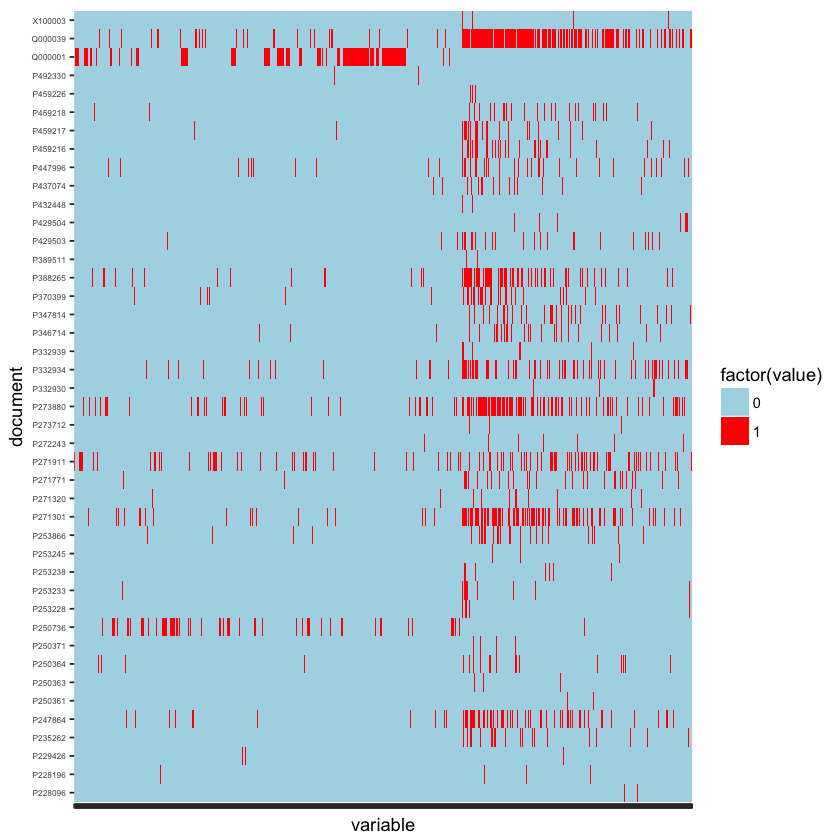

In [37]:
# http://stackoverflow.com/questions/10397183/heat-map-of-binary-data-using-r-or-python

q = qplot(data = melted_dtm_df, x=variable, y=document, fill=factor(value),
     geom="tile")+scale_fill_manual(values=c("0"="lightblue", "1"="red")) +
theme(axis.text.x=element_blank(), axis.text.y = element_text(size = 5))

suppressWarnings(print(q))

Note that Q000001 is included as an outlier. It is a composite document of lists of animals should share very few (if any) entries with the documents included in this corpus. The heatmap above shows good separation between Q000001 and Q000039. That region of the plot is shown separately below.

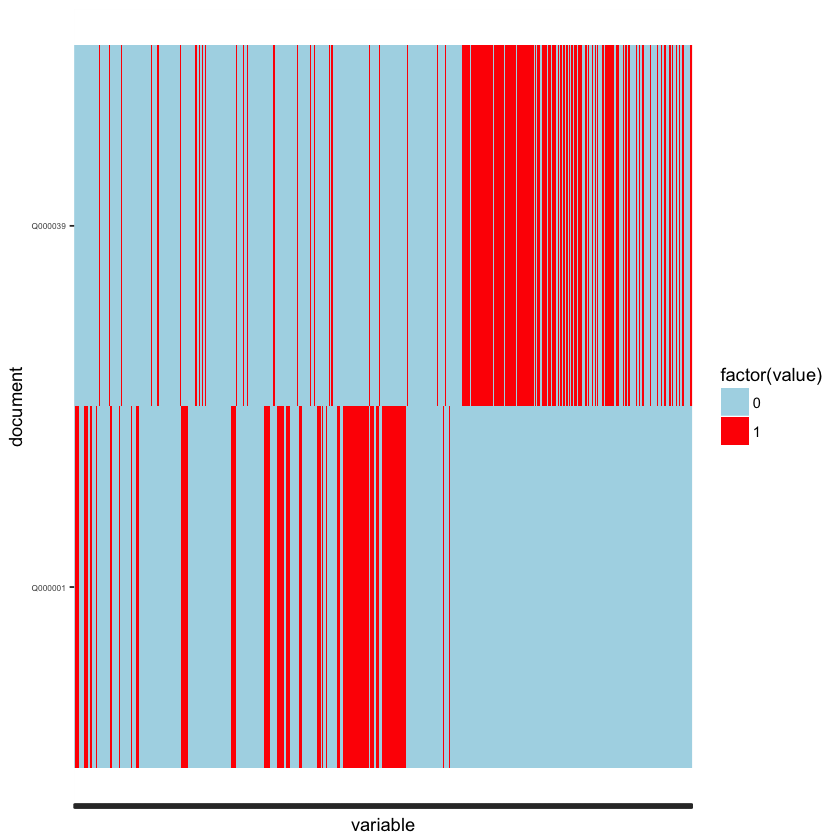

In [38]:
Q_docs = c("Q000001", "Q000039")
Q_doc_data = melted_dtm_df[melted_dtm_df$document %in% Q_docs,]

q2 = qplot(data = Q_doc_data, x=variable, y=document, fill=factor(value),
     geom="tile")+scale_fill_manual(values=c("0"="lightblue", "1"="red")) +
theme(axis.text.x=element_blank(), axis.text.y = element_text(size = 5))

suppressWarnings(print(q2))

## Grouping Documents by Entry Similarity  
We can use hierarchical clustering with our presence/absence matrix to uncover groups of similar documents. Ideally, we can benchmark these clusters' accuracy in uncovering geographically or chronologically related documents by looking at metadata, but for this collection the metadata may be too sparse to do that benchmarking.  

In either case, we can establish a workflow for doing hierarchical clustering and apply that to other datasets with better provenance information to test for cluster utility.  

## Adding provenience by using [ORACC](http://oracc.org) metadata

In [39]:
# Bring in metadata
metadata = read.csv("../data/metadata/dcclt_cat.csv")

# rename metadata "X" column to "document" for merging with our dataframe
metadata$document = metadata$X
metadata$X = NULL
head(metadata)

designation,period,provenience,museum_no,document
"W 06435,a",Uruk III,Uruk,VAT 01533,P000001
"W 06435,b",Uruk III,Uruk,VAT 15263,P000002
"W 09123,d",Uruk IV,Uruk,VAT 15253,P000003
"W 09169,d",Uruk IV,Uruk,VAT 15168,P000004
"W 09206,k",Uruk IV,Uruk,VAT 15153,P000005
"W 09656,h1",Uruk IV,Uruk,VAT 15003,P000006


In [40]:
metadata[which(metadata$provenience == ""),]

,designation,period,provenience,museum_no,document
8782,OB Nippur Ura 03,Old Babylonian,,,Q000001
8783,Archaic Lu A,Archaic,,,Q000002
8784,ED Lu A,Early Dynastic IIIa,,,Q000003
8785,ED Lu E,Early Dynastic,,,Q000006
8786,Archaic Officials,Archaic,,,Q000007
8787,ED Officials,Early Dynastic IIIa,,,Q000008
8788,ED Personal Names and Professions,Early Dynastic,,,Q000010
8789,Archaic Animals A,Archaic,,,Q000011
8790,ED Animals A,Early Dynastic IIIa,,,Q000012
8791,Archaic Fish,Archaic,,,Q000013


In [41]:
# Drop metadata for documents not in this dataset
docs = unique(rownames(dtm_df))
metadata = metadata[which(metadata$document %in% docs),]
nrow(metadata)

[1] 43

In [42]:
all_pairs = all_pairs[,c("doc1", "doc2", "distance")]
head(all_pairs)

,doc1,doc2,distance
692,P273880,Q000039,0.4458874
551,P271301,Q000039,0.4145658
811,P388265,Q000039,0.3717105
199,P247864,Q000039,0.4120000
626,P271911,Q000039,0.5898876
533,P271301,P332934,0.4822134


In [43]:
# create distance matrix object
library(reshape2, lib.loc = lib.dir)
all_pairs_matrix = acast(all_pairs, doc1 ~ doc2, value.var='distance', fun.aggregate = sum, margins=FALSE)

head(all_pairs_matrix)


Attaching package: ‘reshape2’

The following objects are masked from ‘package:reshape’:

    colsplit, melt, recast



,P228196,P229426,P235262,P247864,P250361,P250363,P250364,P250371,P250736,P253228,⋯,P437074,P447996,P459216,P459217,P459218,P459226,P492330,Q000001,Q000039,X100003
P228096,1,1,1.0000000,0.6923077,1.0000000,1.0,0.9230769,1.0,1.0000000,1.0000000,⋯,1.0000000,1.0000000,1.0000000,0.9230769,0.7692308,1.0000000,1,1,0.5384615,1.0000000
P228196,0,1,1.0000000,0.7500000,1.0000000,1.0,1.0000000,1.0,1.0000000,1.0000000,⋯,1.0000000,0.8750000,1.0000000,1.0000000,1.0000000,1.0000000,1,1,0.3750000,1.0000000
P229426,0,0,0.7857143,0.9285714,1.0000000,1.0,1.0000000,1.0,1.0000000,1.0000000,⋯,1.0000000,0.9285714,0.8571429,1.0000000,1.0000000,1.0000000,1,1,0.5000000,1.0000000
P235262,0,0,0.0000000,0.6712329,1.0000000,1.0,0.9027778,0.8,1.0000000,0.8157895,⋯,0.9305556,0.8356164,0.4931507,0.8493151,0.9863014,0.7777778,1,1,0.3835616,0.8666667
P247864,0,0,0.0000000,0.0000000,0.5333333,0.5,0.8055556,0.7,0.9867841,0.5526316,⋯,0.7500000,0.8051948,0.6581197,0.6699029,0.7160494,0.5000000,1,1,0.4120000,0.7666667
P250361,0,0,0.0000000,0.0000000,0.0000000,1.0,1.0000000,1.0,1.0000000,1.0000000,⋯,0.7333333,1.0000000,1.0000000,1.0000000,0.8000000,1.0000000,1,1,0.2666667,1.0000000


In [44]:
all_pairs_matrix["Q000001","Q000039"]

[1] 0.9933775

In [82]:
##remove document column from our dataframe (this information is also saved in the rownames)
#dtm_df$document = NULL

# create clusters
# first transform the df to a matrix and then remove names 
# if the names aren't removed, you get a matrix full of zeros (???)
all_pairs_matrix2 = data.matrix(all_pairs_matrix)
clusters = hclust(dist(unname(all_pairs_matrix2)))

# clusters <- hclust(dist(dtm_df))

In [90]:
str(dist(unname(all_pairs_matrix2)))

Class 'dist'  atomic [1:861] 1.16 1.61 2.08 2.5 2.26 ...
  ..- attr(*, "Size")= int 42
  ..- attr(*, "Diag")= logi FALSE
  ..- attr(*, "Upper")= logi FALSE
  ..- attr(*, "method")= chr "euclidean"
  ..- attr(*, "call")= language dist(x = unname(all_pairs_matrix2))


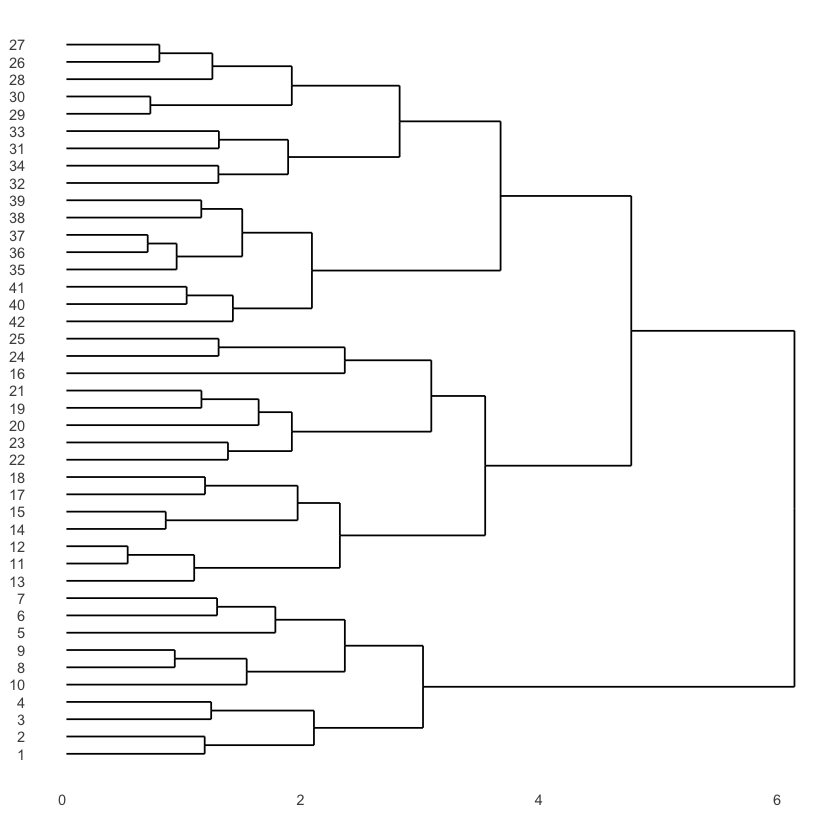

In [84]:
ggdendrogram(clusters, rotate = TRUE)

In [ ]:
# Export plot to pdf
pdf("../plots/dtm_dendrogram_binary_rm_rare_keep_outliers.pdf")
ggdendrogram(clusters, rotate = TRUE) + theme(axis.text.y = element_text(size = 4))
dev.off()

# Notes 

Dendrograms have some elements of stoichasticisity in them, so the plot may not be identical when run multiple times. This is why we do bootstraping to find the level of confidence we have in each node (split in the tree). 

I want to re-build the tree after removing entries that appear only once in the corpus and see if it makes sense. Is there a reason why we would or would not remove very rare entries?

# Niek's Commentary
The two texts that do not belong are [Q000001](http://oracc.org/dcclt/Q000001) and [P250736](http://oracc.org/dcclt/P250736). Both end up - together with [Q000039](http://oracc.org/dcclt/Q000039)! - in the bottom of the graph.

# Erin's Note: 
When I built the tree, [P250736](http://oracc.org/dcclt/P250736) groups with [P271911](http://oracc.org/dcclt/P271911), then to [Q000039](http://oracc.org/dcclt/Q000039) and then to [Q000001](http://oracc.org/dcclt/Q000001). I'm worried that we have a problem with [long-branch attraction](https://en.wikipedia.org/wiki/Long_branch_attraction): all of the closely related documents at the bottom of the tree are the longest documents in the corpus. Long-branch attraction is a systematic problem in phylogenetics when two or more groups that are not closely related to anything else in the dataset (including each other) cluster together. In our case, this could be due to absolute length of the documents, or to the presence of many entries in long documents that don't occur in any of the other documents. 

Apparently we can test for long-branch attraction using the "SAW" method, discussed [here](https://en.wikipedia.org/wiki/Long_branch_attraction#Results).

_________

I ran the notebook again after removing rare entries (entries that only appear in one document). In both versions (with and without rare entries), [P235262](http://oracc.org/dcclt/P235262) and [P370399](http://oracc.org/dcclt/P370399) are sisters.

Q000001 should be excluded from the step where we remove rare entries, as otherwise it has only 3 entries left and will not appear as an outlier, as it should.

I'd like to also make a table of the number of entries shared between each document to give us an idea of the scale of variation we're seeing.



__________

# Niek's Commentary

Two clusters of texts (9 documents) in the top of the graph seem to have little relation to each other:

| text | period | provenience |
|------|--------|-------------|
|[P459218](http://oracc.org/dcclt/P459218)| OB | Isin |
|[P250364](http://oracc.org/dcclt/P250364)| OB | unknown (Ur?) |
|[P437074](http://oracc.org/dcclt/P437074)| MB | Hattuša |
|[P253866](http://oracc.org/dcclt/P253866)| OB | unknown |
|-------------------------------|----|---------|
|[X100003](http://oracc.org/dcclt/X100003)| MB | Ibn Hani (Ugarit)|
|[P432448](http://oracc.org/dcclt/P432448)| OB | unknown |
|[P332939](http://oracc.org/dcclt/P332939)| MB | Ugarit|
|[P253233](http://oracc.org/dcclt/P253233)| OB | unknown|
|[P253228](http://oracc.org/dcclt/P253228)| OB | unknown|

There are four texts that have the rare item *ne-gi-pu-um* also spelled *ne-ki-pu-um*, namely
* [P247864](http://oracc.org/dcclt/P247864) from Šaduppum
* [P273880](http://oracc.org/dcclt/P273880) unknown provenance
* [P388265](http://oracc.org/dcclt/P388265) unknown provenance
* [P347814](http://oracc.org/dcclt/P347814) unknown provenance

In all these cases the word is preceded by an (equally rare) synonym *ka-ta-pu-um*. Both words are unknown in later lexical tradition.

The four texts are more or less grouped towards the bottom of the graph - they are linked at a fairly high level (can we highlight them?)

The category "Isin" is more or less meaningless. This includes some very short (3-line) texts that do not have much in common with each other (and overlap of max. three lines with the longer texts). The three longer texts include
* [P459218](http://oracc.org/dcclt/P459218) second half of the list
* [P459217](http://oracc.org/dcclt/P459217) first half of the list
* [P459216](http://oracc.org/dcclt/P459216) first half of the list

The first, predictably, does not correlate with the other two, but the last two do link. They are reasonably close to [P235262](http://oracc.org/dcclt/P235262)(KM 89542; unprovenanced), which seems to be closely related to the Isin tradition. In between the Isin texts. In between KM 89542 and the Isin texts are [P370399](http://oracc.org/dcclt/P370399) (unprovenanced) and [P271771](http://oracc.org/dcclt/P271771) (Emar). The Emar text is MB (all the others listed are OB), but belongs to the so-called "Syrian" tradition in Emar that is much closer to the OB tradition than other Emar texts. All these texts are of substantial length - it is possible that we have a real connection here.

[P346714](http://oracc.org/dcclt/P346714) (from Ur) and [P250364](http://oracc.org/dcclt/P250364) (unprovenanced, tradition looks like Ur) end up at different ends of the graph.

Texts from Ugarit and Ibn Hani and some from Emar are supposed to be closely related. Can we pull them out?

Conclusions: very short texts do not yield interpretable results and can only be used if they have a rare item or rare spelling.
The "Isin" group needs more research. Display heatmaps of smaller groups of texts?


In [ ]:
# Add colors to dendrogram by provenance
numColors = length(levels(factor(metadata$provenience)))
numColors

getPalette = colorRampPalette(brewer.pal(10, "Dark2"))

myPalette = getPalette(numColors)

names(myPalette) = levels(factor(metadata$provenience))
print(names(myPalette))
show_col(myPalette)

In [ ]:
dtm_df$document = rownames(dtm_df)
dtm_df = merge(dtm_df, metadata, by = "document")

In [ ]:
labelCol = function(x) {
  if (is.leaf(x)) {
    # fetch label
    label = attr(x, "label")
    # print(label)
    group = metadata[which(metadata$document == label),"provenience"]
    group_col = unname(myPalette[as.character(group)])
#    attr(x, "nodePar") = list(lab.col = ifelse(label %in% c("A", "B"), "red", "blue"))
    attr(x, "nodePar") = list(lab.col = group_col)
  }
  return(x)
}

## apply labelCol on all nodes of the dendrogram
par(cex=0.5)
plot(dendrapply(as.dendrogram(clusters), labelCol))

In [ ]:
pdf("../plots/dendrogram_w_provenience.pdf")
par(cex=0.3)
plot(dendrapply(as.dendrogram(clusters), labelCol))
dev.off()

In [ ]:
# Add colors to dendrogram by period
numColors = length(levels(factor(metadata$period)))
numColors
myPalette = brewer_pal(palette = "Paired")(numColors)
names(myPalette) = levels(factor(metadata$period))
print(names(myPalette))
show_col(myPalette)

In [ ]:
labelCol = function(x) {
  if (is.leaf(x)) {
    # fetch label
    label = attr(x, "label")
    # print(label)
    group = metadata[which(metadata$document == label),"period"]
    group_col = unname(myPalette[as.character(group)])
    attr(x, "nodePar") = list(lab.col = group_col)
  }
  return(x)
}

## apply labelCol on all nodes of the dendrogram
par(cex=0.5)
plot(dendrapply(as.dendrogram(clusters), labelCol))

In [ ]:
pdf("../plots/dendrogram_w_period.pdf")
par(cex=0.3)
plot(dendrapply(as.dendrogram(clusters), labelCol))
dev.off()